In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:/ml-data/ml-100k/u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

In [3]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
data.user_id.nunique() # group by user_id

943

In [7]:
data.item_id.nunique()  # group by itme_id

1682

In [8]:
data.duplicated(subset=['user_id', 'item_id']).sum() # 字段user_id, item_id组合重复数 group by user_id, item_id

0

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 666)

In [11]:
train_data.shape

(80000, 4)

In [12]:
test_data.shape

(20000, 4)

### 基于物品对应用户数

In [13]:
item_id_usercnt = train_data.groupby('item_id').count().user_id
item_id_usercnt

item_id
1       361
2       106
3        69
4       164
5        68
       ... 
1676      1
1678      1
1679      1
1681      1
1682      1
Name: user_id, Length: 1652, dtype: int64

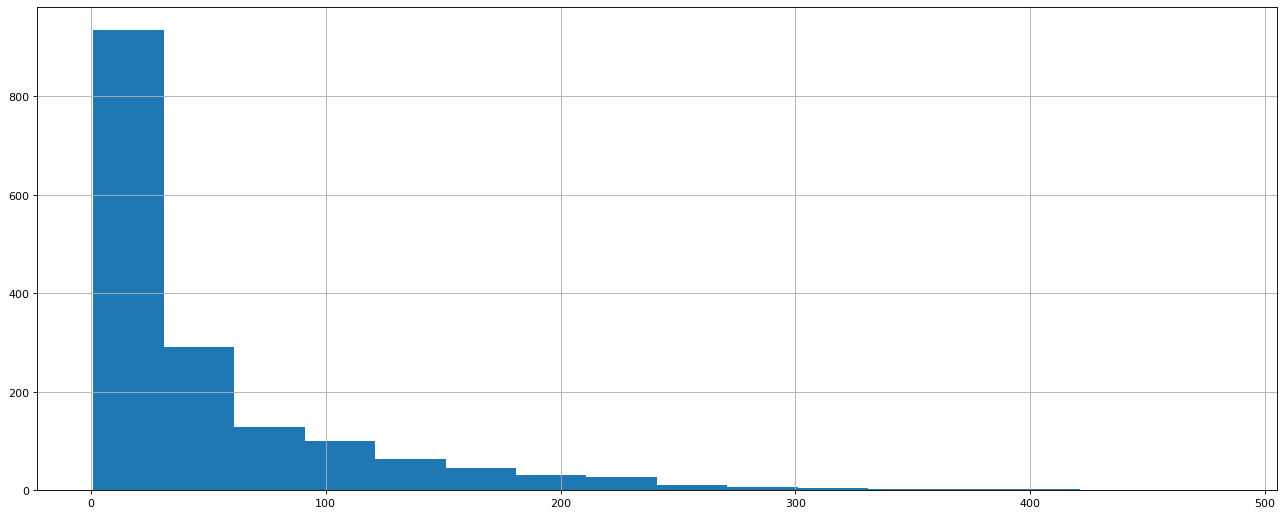

In [14]:
width = 30 #数据间隔
tmp_data = item_id_usercnt.values
bin_num = int(max(tmp_data) - min(tmp_data))
bins = [i for i in range(min(tmp_data), max(tmp_data) + width, width)]


fig = plt.figure(figsize=(20, 8), dpi=80)
plt.hist(tmp_data, bins = bins)
plt.grid()
plt.show()

In [15]:
np.max(tmp_data)

478

In [16]:
np.min(tmp_data)

1

In [17]:
np.sum(item_id_usercnt.values[:9])

1521

In [18]:
item_id_usercnt.values[:10]

array([361, 106,  69, 164,  68,  20, 319, 182, 232,  70], dtype=int64)

In [19]:
np.sum(item_id_usercnt.values <= 30)

935

In [20]:
item_id_usercnt.quantile(q=np.arange(0, 1.1, 0.1))

0.0      1.0
0.1      2.0
0.2      4.0
0.3      7.0
0.4     13.0
0.5     22.0
0.6     35.0
0.7     53.0
0.8     81.0
0.9    134.9
1.0    478.0
Name: user_id, dtype: float64

## 基于用户对应物品数

In [21]:
user_id_itemcnt = train_data.groupby('user_id').count().item_id

In [22]:
user_id_itemcnt[:10]

user_id
1     217
2      51
3      45
4      21
5     136
6     173
7     328
8      44
9      18
10    156
Name: item_id, dtype: int64

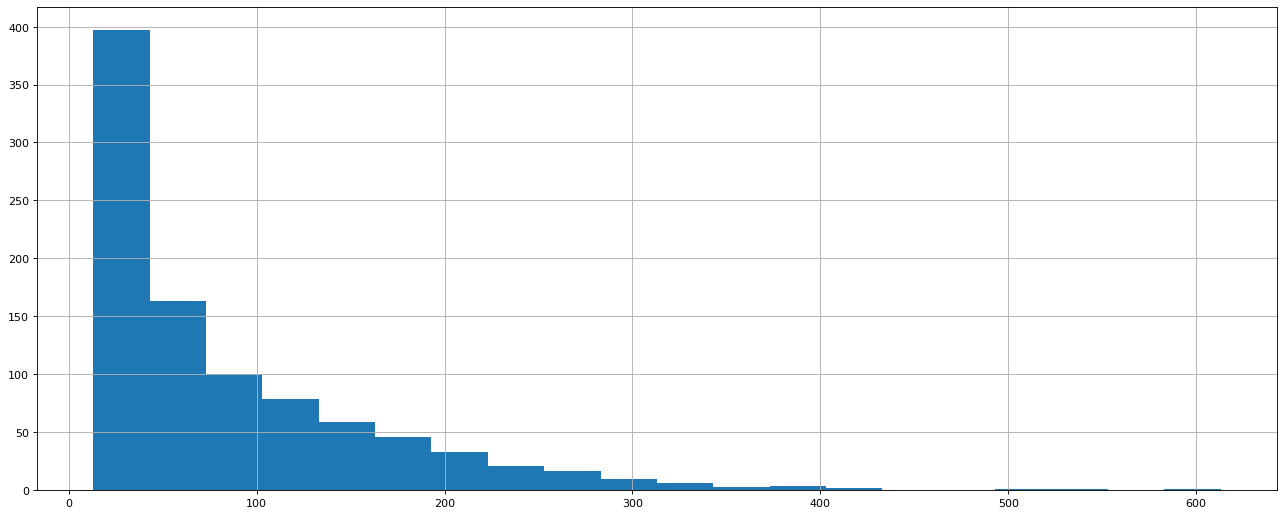

In [24]:
width = 30 #数据间隔
tmp_data = user_id_itemcnt.values
bin_num = int(max(tmp_data) - min(tmp_data))
bins = [i for i in range(min(tmp_data), max(tmp_data) + width, width)]


fig = plt.figure(figsize=(20, 8), dpi=80)
plt.hist(tmp_data, bins = bins)
plt.grid()
plt.show()

In [25]:
user_id_itemcnt.quantile(q=np.arange(0,1.1,0.1))

0.0     13.0
0.1     19.0
0.2     23.0
0.3     30.0
0.4     40.0
0.5     52.0
0.6     74.2
0.7    102.4
0.8    138.0
0.9    195.6
1.0    608.0
Name: item_id, dtype: float64

## 构建用户-物品矩阵（m*n  用户数为m, 物品数为n, 值为评分）

In [35]:
user_num = data.user_id.nunique()

In [36]:
item_num = data.item_id.nunique()

In [37]:
user_item_matrix = np.zeros(shape = (user_num, item_num))

In [38]:
user_item_matrix.shape 

(943, 1682)

In [39]:
for line in train_data.itertuples():
    user_item_matrix[line[1]-1, line[2] - 1] = line[3]  #矩阵下标以0开始，而userid, itemid都是以1开始的。

In [40]:
user_item_matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [43]:
sparsity = round(len(user_item_matrix.nonzero()[1])/float(user_num*item_num),3)
sparsity

0.05

## 物品相似度矩阵
![jupyter](./物品相似矩阵.jpg)

## 基于item 协同过滤推荐－预测原理
![jupyter](./item协同过滤-预测原理.bmp)

In [44]:
from sklearn.metrics.pairwise import pairwise_distances

In [45]:
item_similarity_m = pairwise_distances(user_item_matrix.T,metric='cosine') # 得到物品相似矩阵， (item_num*item_num) 使用余弦距离
# item_similarity_m = pairwise_distances(user_item_matrix.T,metric='euclidean')  # 得到物品相似矩阵， (item_num*item_num) 使用欧式距离
item_similarity_m.shape

(1682, 1682)

In [50]:
item_similarity_m[0:5, 0:5]

array([[0.        , 0.70261674, 0.74008505, 0.65822149, 0.79610354],
       [0.70261674, 0.        , 0.77329641, 0.6510141 , 0.74416738],
       [0.74008505, 0.77329641, 0.        , 0.75501361, 0.84274577],
       [0.65822149, 0.6510141 , 0.75501361, 0.        , 0.7564448 ],
       [0.79610354, 0.74416738, 0.84274577, 0.7564448 , 0.        ]])

In [58]:
# 现在我们只分析上三角，得到等分位数
item_similarity_m_triu = np.triu(item_similarity_m,k=1) # 取得上三角数据
item_similarity_m_triu[0:5, 0:5]

array([[0.        , 0.70261674, 0.74008505, 0.65822149, 0.79610354],
       [0.        , 0.        , 0.77329641, 0.6510141 , 0.74416738],
       [0.        , 0.        , 0.        , 0.75501361, 0.84274577],
       [0.        , 0.        , 0.        , 0.        , 0.7564448 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [60]:
item_sim_nonzero = np.round(item_similarity_m_triu[item_similarity_m_triu.nonzero()],3)
item_sim_nonzero

array([0.703, 0.74 , 0.658, ..., 1.   , 1.   , 1.   ])

In [62]:
np.percentile(item_sim_nonzero,np.arange(0,101,10))

array([0.   , 0.813, 0.872, 0.909, 0.938, 0.964, 0.995, 1.   , 1.   ,
       1.   , 1.   ])

In [65]:
user_item_precdiction = user_item_matrix.dot(item_similarity_m) / np.array([np.abs(item_similarity_m).sum(axis=1)])
# 除以np.array([np.abs(item_similarity_m).sum(axis=1)]是为了可以使评分在1~5之间，使1~5的标准化
user_item_precdiction[0:5, 0:5] 

array([[0.37783711, 0.39299605, 0.40960466, 0.38149281, 0.41881183],
       [0.09290793, 0.10982328, 0.1063202 , 0.10424752, 0.10992306],
       [0.07646792, 0.0789347 , 0.07746811, 0.07804159, 0.07808702],
       [0.04963782, 0.05205573, 0.05166995, 0.05209343, 0.05167351],
       [0.18944985, 0.18968842, 0.20682747, 0.19041248, 0.20626274]])

In [64]:
user_item_precdiction.shape 

(943, 1682)

In [69]:
# 只取数据集中有评分的数据集进行评估
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = user_item_precdiction[user_item_matrix.nonzero()]
user_item_matrix_flatten = user_item_matrix[user_item_matrix.nonzero()]
error_train = sqrt(mean_squared_error(prediction_flatten,user_item_matrix_flatten))  # 均方根误差计算
print('训练集预测均方根误差：',error_train)

训练集预测均方根误差： 3.4445633960721795


## 测试矩阵

In [70]:
test_matrix = np.zeros(shape=(user_num, item_num))

In [71]:
for line in test_data.itertuples():
    test_matrix[line[1]-1, line[2]-1] = line[3]

In [73]:
test_prediction = test_matrix.dot(item_similarity_m) / np.array(np.abs(item_similarity_m).sum(axis=1))

In [75]:
# 只取数据集中有评分的数据集进行评估
prediction_flatten = test_prediction[test_matrix.nonzero()]
test_data_matrix_flatten = test_matrix[test_matrix.nonzero()]
error_test = sqrt(mean_squared_error(prediction_flatten,test_data_matrix_flatten))  # 均方根误差计算
print('测试集预测均方根误差：',error_test)

测试集预测均方根误差： 3.6318004698553463


In [ ]:
# 只取数据集中有评分的数据集进行评估
prediction_flatten = test_prediction[test_matrix.nonzero()]
test_data_matrix_flatten = test_matrix[test_matrix.nonzero()]
error_test = sqrt(mean_squared_error(prediction_flatten,test_data_matrix_flatten))  # 均方根误差计算
print('测试集预测均方根误差：',error_test)